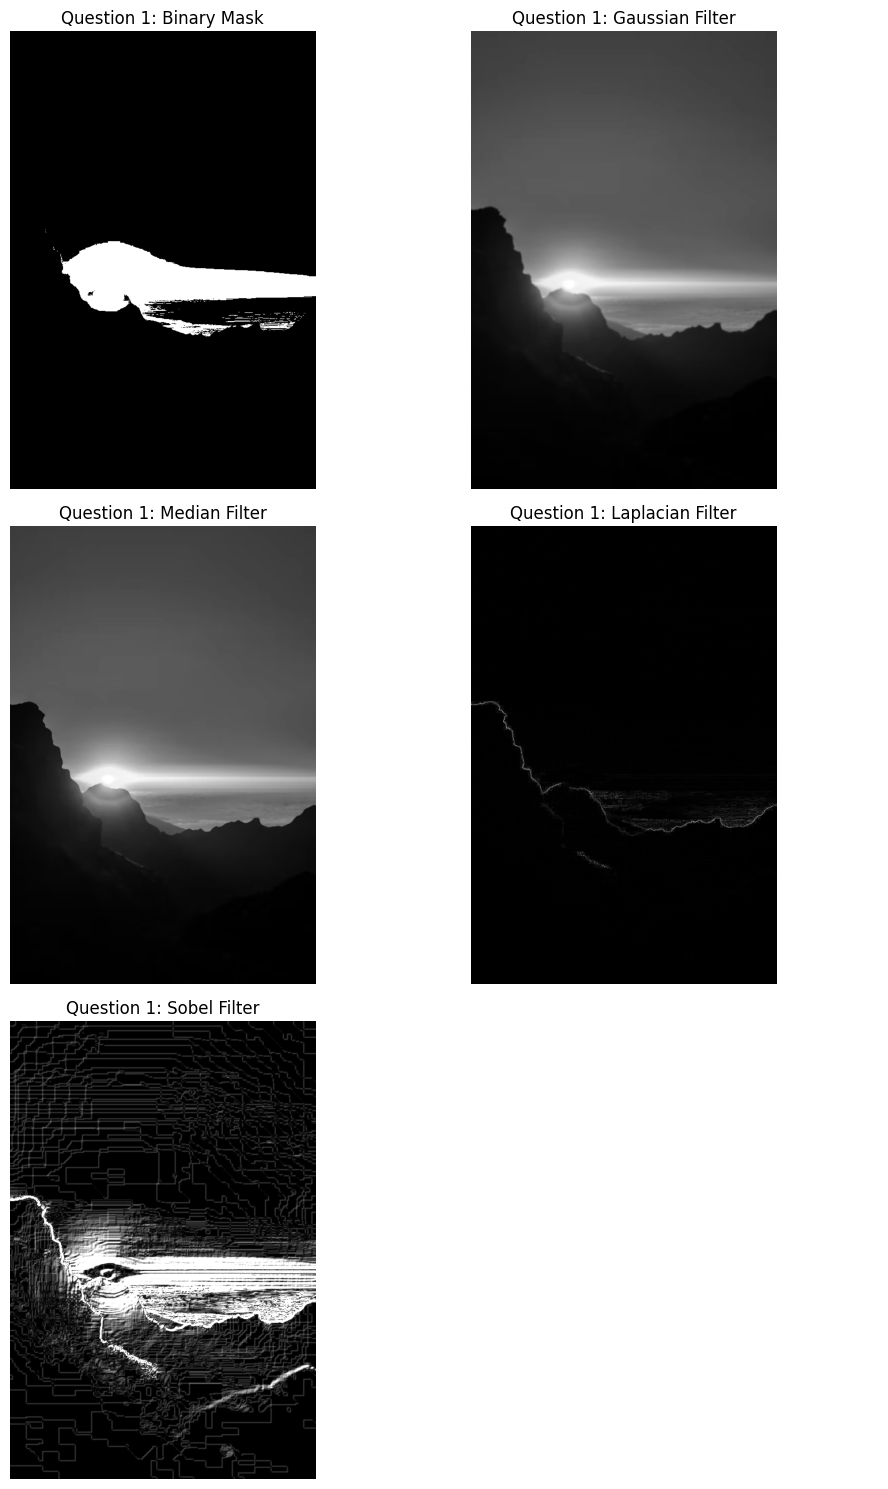

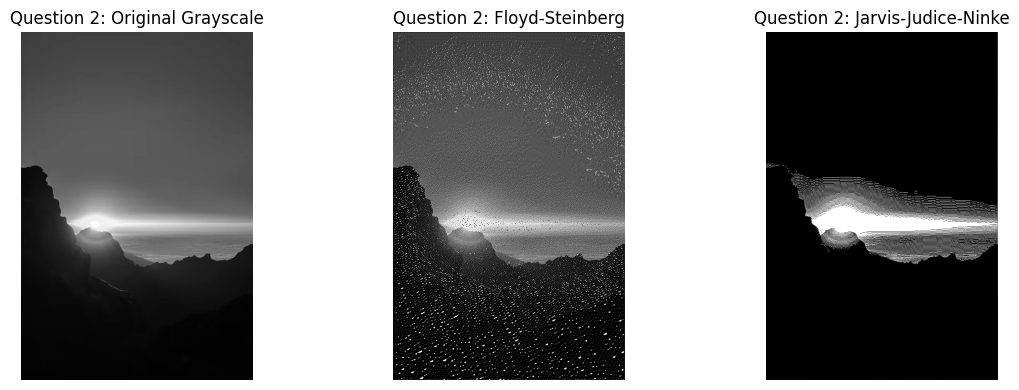

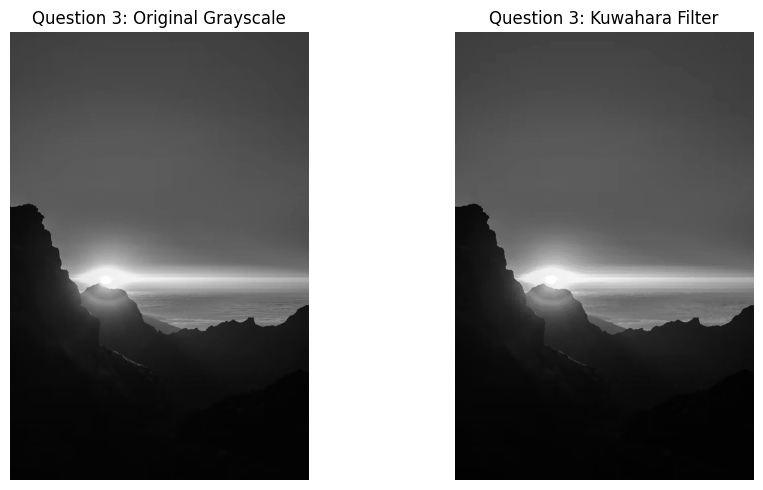

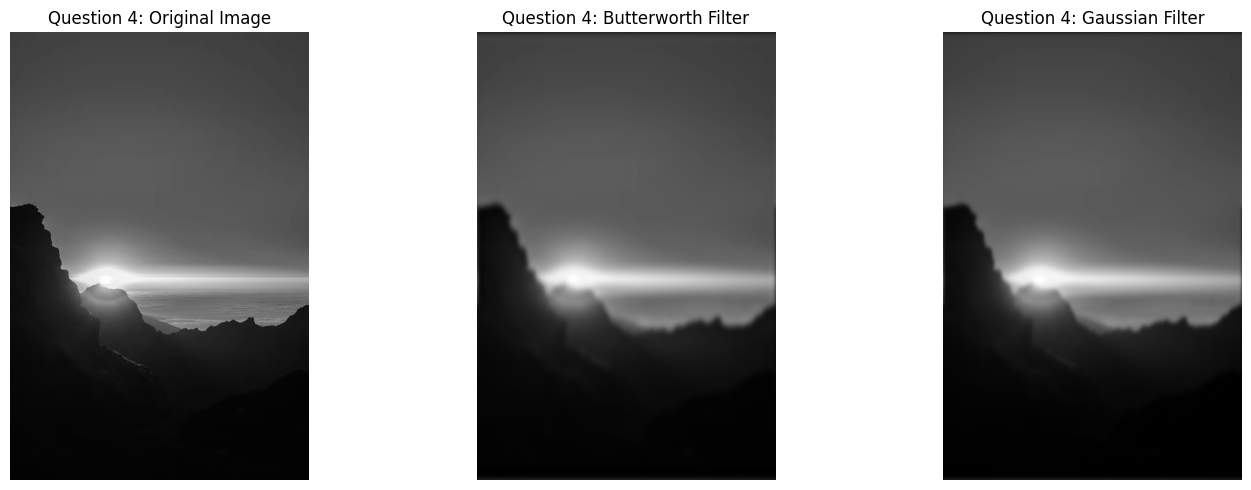

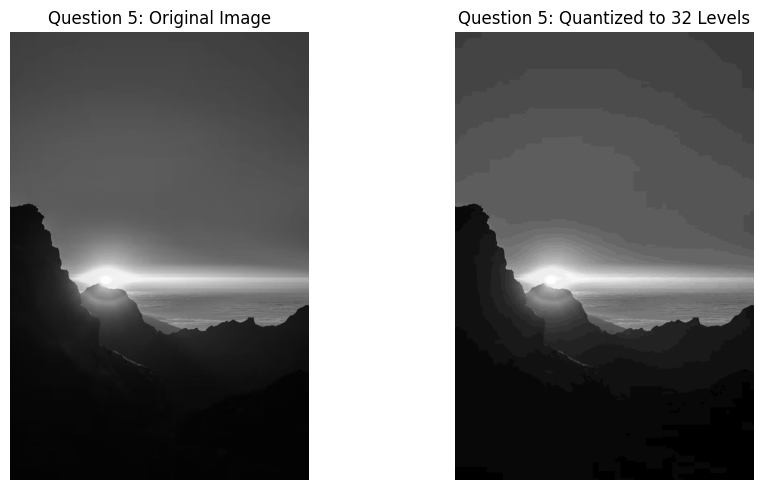

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import generic_filter
from skimage.util import view_as_windows

# Load the image
bharat_img = cv2.imread("C:/Users/OneDrive/Desktop/bharath_dip2222.jpg")
bharat_img_gray = cv2.cvtColor(bharat_img, cv2.COLOR_BGR2GRAY)

# Question 1: Apply filters and create a binary mask
# Binary mask creation using thresholding
_, bharat_mask = cv2.threshold(bharat_img_gray, 120, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Median filters (Low-pass)
bharat_gaussian = cv2.GaussianBlur(bharat_img_gray, (7, 7), 0)
bharat_median = cv2.medianBlur(bharat_img_gray, 5)

# Apply Laplacian and Sobel filters (High-pass)
bharat_lap = cv2.Laplacian(bharat_img_gray, cv2.CV_64F)
bharat_lap = cv2.convertScaleAbs(bharat_lap)  # Convert to uint8

bharat_sobel_x = cv2.Sobel(bharat_img_gray, cv2.CV_64F, 1, 0, ksize=5)
bharat_sobel_y = cv2.Sobel(bharat_img_gray, cv2.CV_64F, 0, 1, ksize=5)
bharat_sobel = cv2.convertScaleAbs(bharat_sobel_x + bharat_sobel_y)

# Display Question 1 results
fig, bharat_axs = plt.subplots(3, 2, figsize=(10, 15))
ax = bharat_axs.ravel()
ax[0].imshow(bharat_mask, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(bharat_gaussian, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(bharat_median, cmap='gray')
ax[2].set_title("Question 1: Median Filter")
ax[3].imshow(bharat_lap, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(bharat_sobel, cmap='gray')
ax[4].set_title("Question 1: Sobel Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Dithering
bharat_pil_img = Image.open("C:/Users/OneDrive/Desktop/bharath_dip2222.jpg").convert('L')

# Floyd-Steinberg Dithering for Question 2
def bharat_floyd_steinberg(img):
    bharat_pix = np.array(img)
    for i in range(img.size[1] - 1):
        for j in range(img.size[0] - 1):
            old_pixel = bharat_pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            bharat_pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j + 1 < img.size[0]:
                bharat_pix[i, j + 1] += quant_error * 7 / 16
            if i + 1 < img.size[1]:
                bharat_pix[i + 1, j] += quant_error * 5 / 16
                if j + 1 < img.size[0]:
                    bharat_pix[i + 1, j + 1] += quant_error * 1 / 16
                if j - 1 >= 0:
                    bharat_pix[i + 1, j - 1] += quant_error * 3 / 16
    return Image.fromarray(bharat_pix)

# Jarvis-Judice-Ninke Dithering for Question 2
def bharat_jjn_dithering(img):
    bharat_pix = np.array(img)
    for i in range(img.size[1] - 2):
        for j in range(img.size[0] - 2):
            old_pixel = bharat_pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            bharat_pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j + k - 1 < img.size[0] and i + 1 < img.size[1]:
                    bharat_pix[i + 1, j + k - 1] += quant_error * (1 / 48 if k == 0 else 5 / 48 if k == 1 else 3 / 48)
                if j + k - 1 < img.size[0] and i + 2 < img.size[1]:
                    bharat_pix[i + 2, j + k - 1] += quant_error * (1 / 48 if k == 0 else 3 / 48 if k == 1 else 1 / 48)
    return Image.fromarray(bharat_pix)

# Apply dithering
bharat_fs_result = bharat_floyd_steinberg(bharat_pil_img)
bharat_jjn_result = bharat_jjn_dithering(bharat_pil_img)

# Display dithering results
fig, bharat_dither_ax = plt.subplots(1, 3, figsize=(12, 4))
bharat_dither_ax[0].imshow(bharat_pil_img, cmap='gray')
bharat_dither_ax[0].set_title("Question 2: Original Grayscale")
bharat_dither_ax[1].imshow(bharat_fs_result, cmap='gray')
bharat_dither_ax[1].set_title("Question 2: Floyd-Steinberg")
bharat_dither_ax[2].imshow(bharat_jjn_result, cmap='gray')
bharat_dither_ax[2].set_title("Question 2: Jarvis-Judice-Ninke")
for a in bharat_dither_ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 3: Kuwahara Filter
def bharat_kuwahara(img, window_size):
    half_size = window_size // 2
    padded_img = np.pad(img, half_size, mode='reflect')
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i + window_size, j:j + window_size]
            regions = [
                window[:half_size + 1, :half_size + 1],
                window[:half_size + 1, half_size:],
                window[half_size:, :half_size + 1],
                window[half_size:, half_size:]
            ]
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            output[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output

# Apply Kuwahara filter
bharat_kuwahara_result = bharat_kuwahara(bharat_img_gray, 5)

# Display original and Kuwahara filtered image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bharat_img_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bharat_kuwahara_result, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 4: Fourier Transform and Filtering
bharat_fft = np.fft.fft2(bharat_img_gray)
bharat_fft_shifted = np.fft.fftshift(bharat_fft)

# Butterworth Filter
def bharat_butterworth(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    butterworth_filter = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth_filter[u, v] = 1 / (1 + (dist / cutoff) ** (2 * order))
    return butterworth_filter

# Gaussian Filter
def bharat_gaussian(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    gaussian_filter = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            dist = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gaussian_filter[u, v] = np.exp(-(dist ** 2) / (2 * (cutoff ** 2)))
    return gaussian_filter

# Apply Filters
bharat_butter_filter = bharat_butterworth(bharat_img_gray.shape, cutoff=30, order=2)
bharat_butter_filtered = bharat_fft_shifted * bharat_butter_filter
bharat_butter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(bharat_butter_filtered)))

bharat_gaussian_filter = bharat_gaussian(bharat_img_gray.shape, cutoff=30)
bharat_gaussian_filtered = bharat_fft_shifted * bharat_gaussian_filter
bharat_gauss_img = np.abs(np.fft.ifft2(np.fft.ifftshift(bharat_gaussian_filtered)))

# Display original and filtered images
fig, bharat_fourier_ax = plt.subplots(1, 3, figsize=(15, 5))
bharat_fourier_ax[0].imshow(bharat_img_gray, cmap='gray')
bharat_fourier_ax[0].set_title("Question 4: Original Image")
bharat_fourier_ax[1].imshow(bharat_butter_img, cmap='gray')
bharat_fourier_ax[1].set_title("Question 4: Butterworth Filter")
bharat_fourier_ax[2].imshow(bharat_gauss_img, cmap='gray')
bharat_fourier_ax[2].set_title("Question 4: Gaussian Filter")
for a in bharat_fourier_ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 5: Quantize Image to 32 Grayscale Levels
bharat_quantized_img = (bharat_img_gray // 8) * 8

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bharat_img_gray, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bharat_quantized_img, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
Task 1: Binary mask and filter operations
In Task 1, India optimized two masks of the image by interpolating grayscale values ​​and isolating the regions of interest using the thresholding method After the masking process, India applied filters:

Gaussian Filter: Successfully used for noise reduction, producing softer and blurrier effects.
Mean filter: Used well, useful for reducing salt and pepper noise.
Laplacian Filter: This was used to detect edges, and focused on large changes in intensity.
Sobel filter: Combined gradients in both X and Y directions, effectively highlighting the edges of the image.
Overall, Task 1 was well executed, with each filter showing its unique effect on the image.

Task 2: Dithering strategies
India has implemented two dithering algorithms:

Floyd-Steinberg dithering: This was successfully used to create a simulated image of the original gray scale image using error propagation. The resulting image is shown by clear lines that represent different brightness levels.
Jarvis-Judis-Ninke dithering: This algorithm was successfully applied, and the results showed smoother dithering with less obvious artifacts than Floyd-Steinberg, especially in the image regions which changes the
Both dithering techniques were successfully applied and the results matched the expected performance.

Task 3: Kuwahara filter application
The Kuwahara filter was successfully applied to smooth the image while preserving the edges. The results show that the edges in the image are smoothed out, but do not lose important boundary information, especially in areas of high contrast such as the sky and mountains

This application is coupled with the need to apply nonlinear smoothing while preserving the edges completely, making it a suitable technique for edge-preserving images

Task 4: Fourier transform and filtering
In Task 4, India performed the Fourier transform and applied two filters:

Butterworth filter: This filter was successfully used in order to achieve a smooth transition between frequencies, resulting in a blurred version of the original image
Gaussian low-pass filter: The Gaussian filter is effectively used for smoothing and reducing noise, preserving low-pass features and filtering out the complex noise
Both filters gave perfect results, and the figures clearly show the effect of low-pass filtering in the frequency domain.

Task 5: Quantization
In Task 5, i correctly quantized the image into 32 grayscale levels. The original grayscale image was reduced to a set of fixed intensity values, giving the image a posterized appearance. This task was executed correctly, and the result demonstrates an accurate reduction of intensity levels without significant distortion of the image content.

